In [2]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

nx,ny=64,146

#X=np.load('0-64-60-124/spatial_X.npy')#[:nx,60:60+ny,:]
X=np.load('full_spatial_X.npy')#[:nx,60:60+ny,:]
#print(np.abs(X).min())
#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

from sklearn.decomposition import PCA

n_pca=4096

#argmin=X[:,:,0].argmin()
pca = PCA(n_components=n_pca, svd_solver='randomized')

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

pca_features=pca.fit_transform(FA_spatial)#components_

"""
id_zero=np.abs(X[:,0]).argmin()
print(X[id_zero])
pca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_
pca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)
"""


'\nid_zero=np.abs(X[:,0]).argmin()\nprint(X[id_zero])\npca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_\npca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)\n'

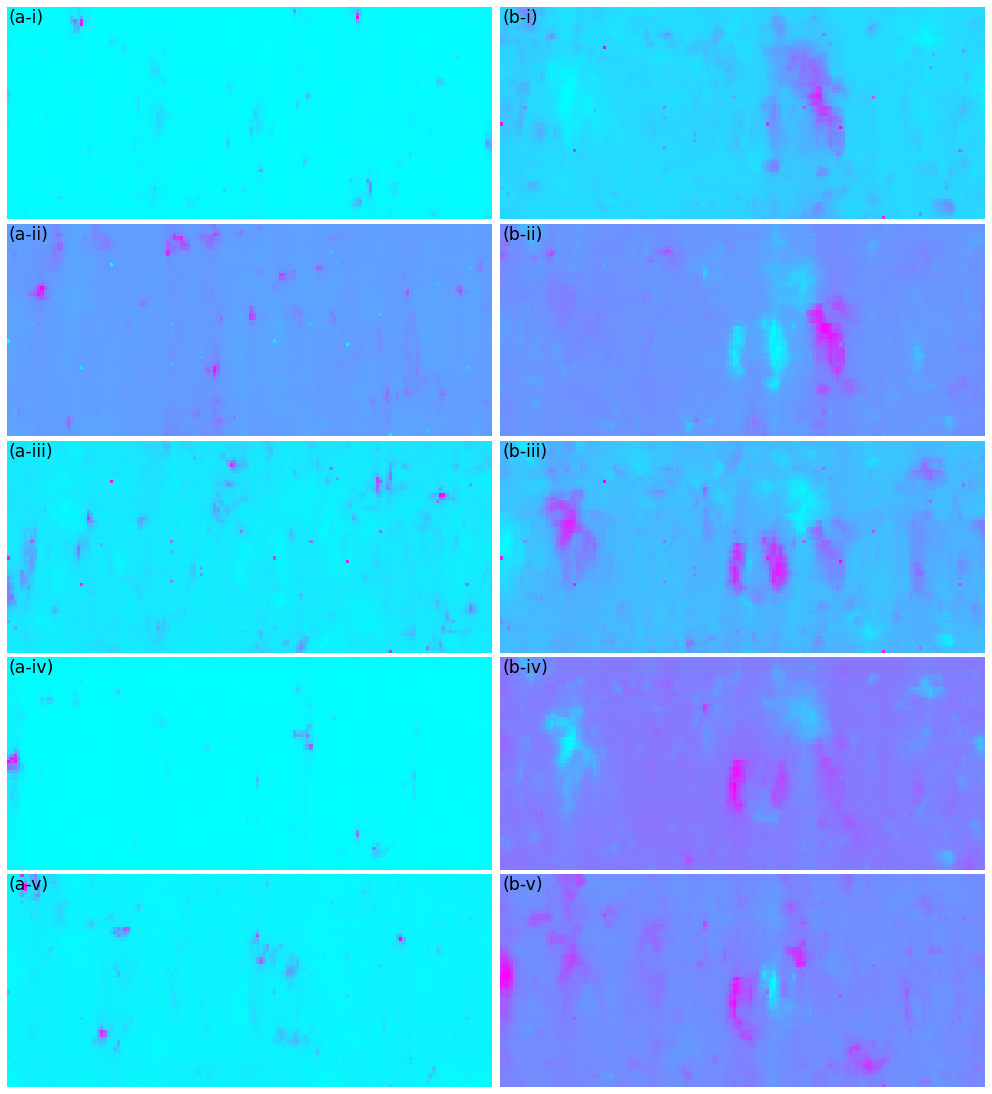

In [7]:
#pca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_
#pca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)

from matplotlib.patches import ConnectionPatch
from matplotlib.path import Path

X=X.reshape((nx,ny,512,512))

rom=['i','ii','iii','iv','v','vi','vii','viii']
ratio=ny/nx

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=5, ncols=2, left=0, right=0.5*ratio,bottom=0,top=1.25, wspace=0.002,hspace=0.02)

for i in range(1):
    for j in range(5):
        ax = fig.add_subplot(gs[j,i])
        ax.axis('off')
        ax.imshow(FA_spatial[:,j].reshape((nx,ny)),cmap='cool')#cmap='PRGn')
        ax.text(0,0,"(a-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='black')

###########################################
for i in range(1,2):
    for j in range(5):
        ax = fig.add_subplot(gs[j,i])
        ax.axis('off')
        ax.imshow(pca_features[:,j].reshape((nx,ny)),cmap='cool')
        ax.text(0,0,"(b-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='black')
#ax14=fig.add_subplot(gs[1,4])
#ax14.axis('off')
#ax14.imshow(pca_features[:,j].reshape((64,64)),cmap='RdBu')
#ax14.text(0,0,"(b-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='black')



###########################################

#axins.tick_params(left=False,right=False,top=False,bottom=False)

#axins.set_xticklabels('')
#axins.set_yticklabels('')

#ax.indicate_inset_zoom(axins,edgecolor='red')





plt.savefig('fig5.tif',format='tif',bbox_inches ='tight')

<Figure size 432x288 with 0 Axes>

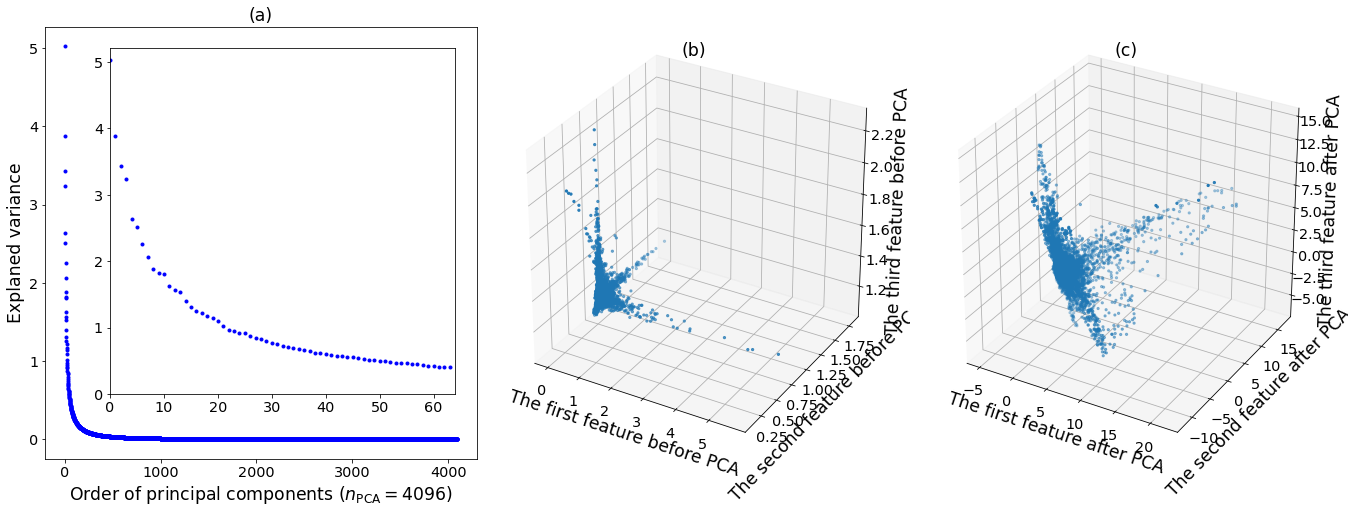

In [16]:
plt.clf()

fig = plt.figure(constrained_layout=False,figsize=(15,15))
gs = fig.add_gridspec(nrows=1, ncols=3, left=0, right=1.2,bottom=0,top=0.4, wspace=0.002,hspace=0.02)

ax=fig.add_subplot(gs[0,0])
ax.plot(np.arange(n_pca), pca.explained_variance_,'b.')
ax.set_xlabel("Order of principal components ($n_{\mathrm{PCA}}=%i$)"%n_pca,size='xx-large')
ax.set_ylabel("Explaned variance",size='xx-large')

ax.tick_params(axis='x', labelsize= "x-large")
ax.tick_params(axis='y', labelsize= "x-large")

axins = ax.inset_axes([0.15, 0.15, 0.8, 0.8])
axins.plot(np.arange(64), pca.explained_variance_[:64],'b.')
# sub region of the original image
x1, x2, y1, y2 = 0,64,0,5.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.tick_params(axis='x', labelsize= "x-large")
axins.tick_params(axis='y', labelsize= "x-large")

ax.set_title("(a)",size='xx-large')


ax=fig.add_subplot(gs[0,1], projection='3d')
ax.scatter(FA_spatial[:,0], FA_spatial[:,1], FA_spatial[:,2], marker='.')

ax.set_xlabel('The first feature before PCA',size='xx-large')
ax.set_ylabel('The second feature before PCA',size='xx-large')
ax.set_zlabel('The third feature before PCA',size='xx-large')

ax.tick_params(axis='x', labelsize= "x-large")
ax.tick_params(axis='y', labelsize= "x-large")
ax.tick_params(axis='z', labelsize= "x-large")

ax.set_title("(b)",size='xx-large')


ax=fig.add_subplot(gs[0,2], projection='3d')
ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], marker='.')

ax.set_xlabel('The first feature after PCA',size='xx-large')
ax.set_ylabel('The second feature after PCA',size='xx-large')
ax.set_zlabel('The third feature after PCA',size='xx-large')

ax.tick_params(axis='x', labelsize= "x-large")
ax.tick_params(axis='y', labelsize= "x-large")
ax.tick_params(axis='z', labelsize= "x-large")

ax.set_title("(c)",size='xx-large')

#ax.set_xlabel("Order of principal components ($n_{\mathrm{PCA}}=%i$)"%n_pca,size='xx-large')
#ax.set_ylabel("Explaned variance",size='xx-large')

plt.savefig('fig6.tif',format='tif',bbox_inches ='tight')

<Figure size 432x288 with 0 Axes>

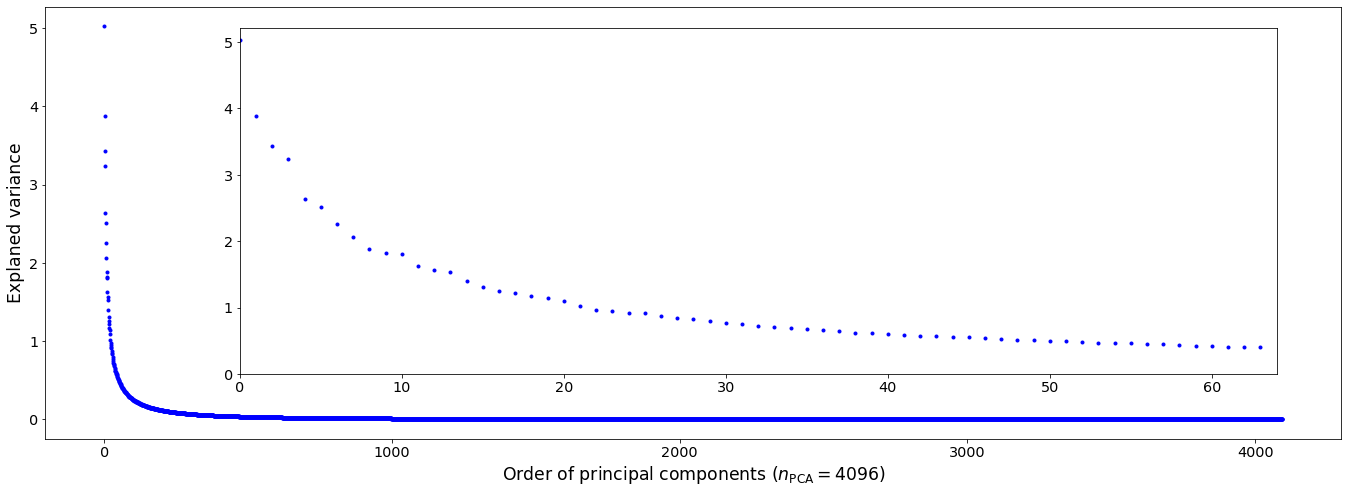

In [17]:
plt.clf()

fig = plt.figure(constrained_layout=False,figsize=(15,15))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1.2,bottom=0,top=0.4, wspace=0.002,hspace=0.02)

ax=fig.add_subplot(gs[0,0])
ax.plot(np.arange(n_pca), pca.explained_variance_,'b.')
ax.set_xlabel("Order of principal components ($n_{\mathrm{PCA}}=%i$)"%n_pca,size='xx-large')
ax.set_ylabel("Explaned variance",size='xx-large')

ax.tick_params(axis='x', labelsize= "x-large")
ax.tick_params(axis='y', labelsize= "x-large")

axins = ax.inset_axes([0.15, 0.15, 0.8, 0.8])
axins.plot(np.arange(64), pca.explained_variance_[:64],'b.')
# sub region of the original image
x1, x2, y1, y2 = 0,64,0,5.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.tick_params(axis='x', labelsize= "x-large")
axins.tick_params(axis='y', labelsize= "x-large")